In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [4]:
police = pd.read_csv('/Users/keri/git/DotLovesData/data/police data.csv')
police.head()

,Date,AU2017_code,crime,n,Pop
0,2018-02-01,500100,Abduction,0,401
1,2018-03-01,500100,Abduction,0,402
2,2018-04-01,500100,Abduction,0,408
3,2018-05-01,500100,Abduction,0,409
4,2018-06-01,500100,Abduction,0,410


In [2]:
community = pd.read_csv('/Users/keri/git/DotLovesData/data/community data.csv')
community.head()

,AU2017_code,Date,AU_GMP_PER_CAPITA,Dep_Index,AU2017_name,TA2018_name,TALB
0,500100,2013-03-01,62.732541,9.0,Awanui,Far North District,Far North District
1,500202,2013-03-01,12.123131,9.0,Karikari Peninsula-Maungataniwha,Far North District,Far North District
2,500203,2013-03-01,151.841014,9.0,Taipa Bay-Mangonui,Far North District,Far North District
3,500204,2013-03-01,56.465011,8.0,Herekino,Far North District,Far North District
4,500205,2013-03-01,0.000000,9.0,Ahipara,Far North District,Far North District


In [6]:
community.shape

(16461, 7)

In [7]:
police.shape

(241605, 5)

In [8]:
community.describe()

,AU2017_code,AU_GMP_PER_CAPITA,Dep_Index
count,16461.000000,16461.000000,15159.000000
mean,520229.964218,51.083592,5.664226
std,26352.084129,39.843059,2.950049
min,500100.000000,0.000000,1.000000
25%,506655.000000,22.662427,3.000000
50%,514500.000000,49.593881,5.000000
75%,522712.000000,70.565751,8.000000
max,617903.000000,391.258348,10.000000


In [9]:
police.describe()

,AU2017_code,n,Pop
count,241605.000000,241605.000000,241605.000000
mean,520229.964218,1.009209,3451.114017
std,26351.338211,3.013260,2343.551581
min,500100.000000,0.000000,0.000000
25%,506655.000000,0.000000,1683.000000
50%,514500.000000,0.000000,3410.000000
75%,522712.000000,1.000000,4963.000000
max,617903.000000,113.000000,15447.000000


# Merge Community and Police Spreadsheets

In [10]:
merged_df = community.merge(police,on='AU2017_code')

In [11]:
merged_df.shape

(7489755, 11)

# Explore NA data

-- Take the list of codes in merged datasets to see if there is any non null data

-- All data from the codes in code_na.index df are missing deprivation scores, GMP per capita, and not sure if population data is accurate as it is 0 in all quartiles except 75% which has a mean of 7.

In [12]:
community.isna().sum(axis=0)

AU2017_code             0
Date                    0
AU_GMP_PER_CAPITA       0
Dep_Index            1302
AU2017_name             0
TA2018_name             0
TALB                    0
dtype: int64

In [13]:
police.isna().sum()

Date           0
AU2017_code    0
crime          0
n              0
Pop            0
dtype: int64

In [3]:
#There are 31 different dates that have na as the deprivation index. 
#Does this mean you will find the same codes in every date?
community[community['Dep_Index'].isna()].groupby(by='Date').count().shape

(31, 6)

In [4]:
#There are 42 codes for each 31 rows of dates. 
community[community['Dep_Index'].isna()].groupby(by='Date').mean().describe()

,AU2017_code,AU_GMP_PER_CAPITA,Dep_Index
count,31.000000,31.0,0.0
mean,596798.142857,0.0,NaN
std,0.000000,0.0,NaN
min,596798.142857,0.0,NaN
25%,596798.142857,0.0,NaN
50%,596798.142857,0.0,NaN
75%,596798.142857,0.0,NaN
max,596798.142857,0.0,NaN


In [16]:
community[community['Dep_Index'].isna()].groupby(by='AU2017_code').count().shape

(42, 6)

In [17]:
#confirmed using code in instead of date, to ensure there would be 42 rows of codes with 31 dates in each.
community[community['Dep_Index'].isna()].groupby(by='AU2017_code').count()

,Date,AU_GMP_PER_CAPITA,Dep_Index,AU2017_name,TA2018_name,TALB
AU2017_code,,,,,,
501613,31,31,0,31,31,31
501813,31,31,0,31,31,31
505911,31,31,0,31,31,31
506620,31,31,0,31,31,31
520803,31,31,0,31,31,31
520804,31,31,0,31,31,31
520900,31,31,0,31,31,31
522605,31,31,0,31,31,31
614502,31,31,0,31,31,31


In [18]:
#the AU2017_code values that have data missing across all days
code_na = community[community['Dep_Index'].isna()].groupby(by='AU2017_code').count()
code_na.index

Int64Index([501613, 501813, 505911, 506620, 520803, 520804, 520900, 522605,
            614502, 614601, 614700, 614800, 615101, 615102, 615301, 615302,
            615800, 615900, 616001, 616002, 616100, 616200, 616300, 616400,
            617101, 617102, 617200, 617400, 617501, 617502, 617503, 617602,
            617604, 617605, 617606, 617702, 617703, 617704, 617800, 617901,
            617902, 617903],
           dtype='int64', name='AU2017_code')

In [19]:
#get merged data for all codes with NA
all_na = merged_df[merged_df['AU2017_code'].isin(list(code_na.index))]

In [20]:
all_na.shape

(592410, 11)

In [21]:
#double check there is no other missing data in other columns
all_na.isna().sum()

AU2017_code               0
Date_x                    0
AU_GMP_PER_CAPITA         0
Dep_Index            592410
AU2017_name               0
TA2018_name               0
TALB                      0
Date_y                    0
crime                     0
n                         0
Pop                       0
dtype: int64

In [22]:
#there is police data so need to think about how to deal with NA if we are asking questions/predicting about crime rates.
all_na.describe()

,AU2017_code,AU_GMP_PER_CAPITA,Dep_Index,n,Pop
count,592410.000000,592410.0,0.0,592410.000000,592410.000000
mean,596798.142857,0.0,NaN,0.011617,8.486395
std,41019.220354,0.0,NaN,0.123490,22.048377
min,501613.000000,0.0,NaN,0.000000,0.000000
25%,614700.000000,0.0,NaN,0.000000,0.000000
50%,616150.000000,0.0,NaN,0.000000,0.000000
75%,617602.000000,0.0,NaN,0.000000,7.000000
max,617903.000000,0.0,NaN,4.000000,126.000000


In [22]:
all_na.head()

,AU2017_code,Date_x,AU_GMP_PER_CAPITA,Dep_Index,AU2017_name,TA2018_name,TALB,Date_y,crime,n,Pop
352625,501613,2013-03-01,0.0,NaN,Bay of Islands,Far North District,Far North District,2018-07-01,Abduction,0,11
352626,501613,2013-03-01,0.0,NaN,Bay of Islands,Far North District,Far North District,2018-08-01,Abduction,0,11
352627,501613,2013-03-01,0.0,NaN,Bay of Islands,Far North District,Far North District,2019-01-01,Abduction,0,12
352628,501613,2013-03-01,0.0,NaN,Bay of Islands,Far North District,Far North District,2019-03-01,Abduction,0,12
352629,501613,2013-03-01,0.0,NaN,Bay of Islands,Far North District,Far North District,2020-02-01,Abduction,0,13


In [42]:
all_na['crime_proportion'] = all_na['n'] / all_na['Pop']

/Users/keri/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
#get only the rows that have reported crimes
na_greater_zero = all_na[all_na['n'] > 0]
na_greater_zero['crime_proportion'] = na_greater_zero['n'] / na_greater_zero['Pop']

/Users/keri/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
na_greater_zero['AU2017_code'].unique()

array([501613, 506620, 520803, 520804, 520900, 522605, 614502, 614800,
       615101, 615102, 615301, 616002, 617101, 617400, 617501, 617602,
       617605, 617606, 617702, 617703, 617704, 617901, 617902, 617903])

In [25]:
na_greater_zero['Date_y'].unique()

array(['2018-07-01', '2018-08-01', '2019-01-01', '2019-03-01',
       '2020-06-01', '2020-02-01', '2020-12-01', '2020-11-01',
       '2020-04-01', '2018-10-01', '2018-11-01', '2019-07-01',
       '2019-12-01', '2020-09-01', '2018-12-01', '2018-02-01',
       '2019-05-01', '2019-10-01', '2020-03-01', '2020-07-01',
       '2018-03-01', '2020-08-01', '2019-04-01', '2018-09-01',
       '2018-04-01', '2019-02-01', '2020-01-01', '2018-06-01',
       '2020-10-01', '2019-11-01', '2019-06-01', '2018-05-01',
       '2020-05-01', '2019-09-01'], dtype=object)

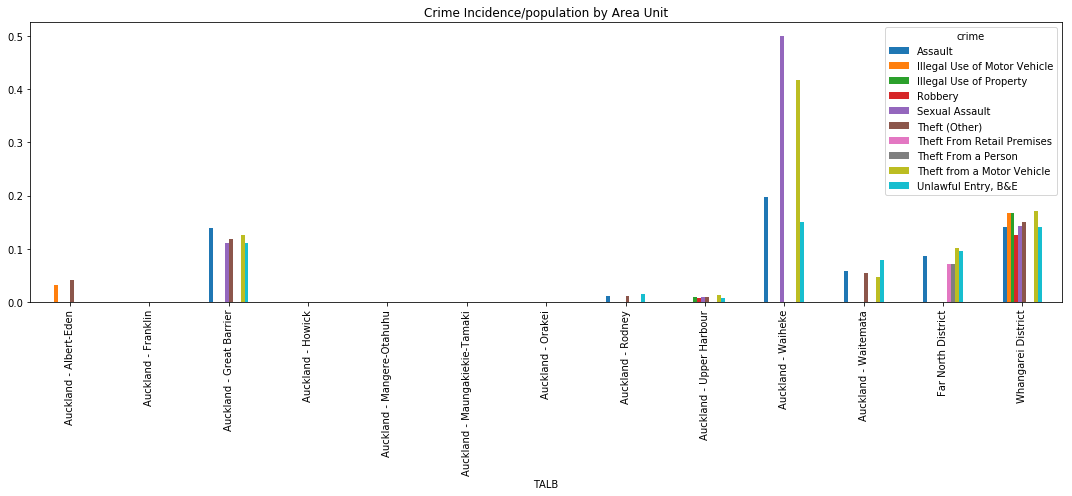

In [94]:
fig, ax = plt.subplots(figsize=(15,7))

na_greater_zero.groupby(['TALB','crime']).mean()['crime_proportion'].unstack().plot(kind='bar',ax=ax,title='Crime Incidence/population by Area Unit')
plt.tight_layout()
plt.savefig('/Users/keri/git/DotLovesData/visuals/NANDataCrimeDataByTALB.png')

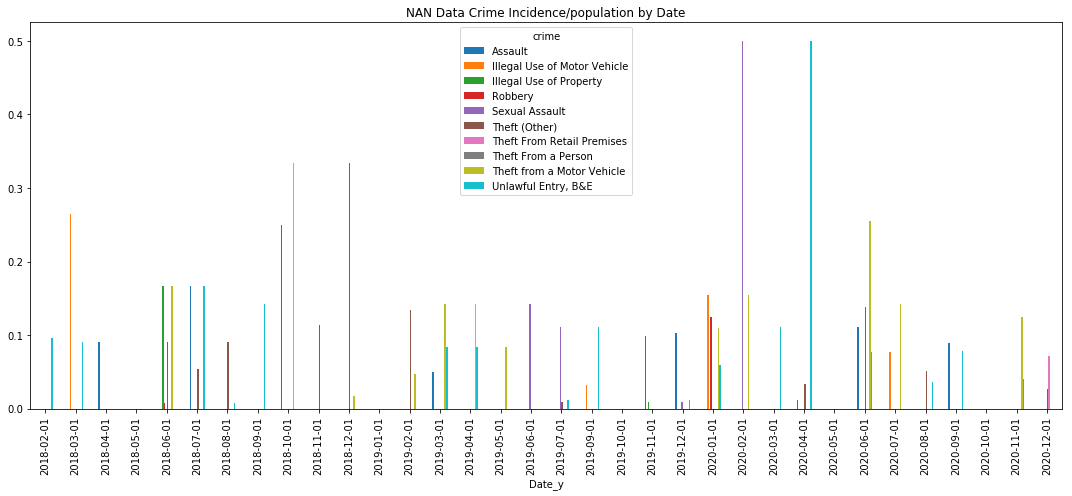

In [93]:
fig, ax = plt.subplots(figsize=(15,7))

na_greater_zero.groupby(['Date_y','crime']).mean()['crime_proportion'].unstack().plot(kind='bar',ax=ax,title='NAN Data Crime Incidence/population by Date')
plt.tight_layout()
plt.savefig('/Users/keri/git/DotLovesData/visuals/NANDateCrimeDataByDate.png')

# Clean Data

-- Remove the columns with NA values, of which I have confirmed there is no information in police data 

In [26]:
merged_df.isna().sum()

AU2017_code               0
Date_x                    0
AU_GMP_PER_CAPITA         0
Dep_Index            592410
AU2017_name               0
TA2018_name               0
TALB                      0
Date_y                    0
crime                     0
n                         0
Pop                       0
dtype: int64

In [27]:
#df = df[df['EPS'].notna()]
merged_cleaned = merged_df[merged_df['Dep_Index'].notna()]

In [33]:
merged_cleaned.shape

(6897345, 11)

In [30]:
merged_cleaned.head()

,AU2017_code,Date_x,AU_GMP_PER_CAPITA,Dep_Index,AU2017_name,TA2018_name,TALB,Date_y,crime,n,Pop
0,500100,2013-03-01,62.732541,9.0,Awanui,Far North District,Far North District,2018-02-01,Abduction,0,401
1,500100,2013-03-01,62.732541,9.0,Awanui,Far North District,Far North District,2018-03-01,Abduction,0,402
2,500100,2013-03-01,62.732541,9.0,Awanui,Far North District,Far North District,2018-04-01,Abduction,0,408
3,500100,2013-03-01,62.732541,9.0,Awanui,Far North District,Far North District,2018-05-01,Abduction,0,409
4,500100,2013-03-01,62.732541,9.0,Awanui,Far North District,Far North District,2018-06-01,Abduction,0,410


In [31]:
len(merged_cleaned['TALB'].unique())

24

In [32]:
len(merged_cleaned['TA2018_name'].unique())

4

In [35]:
len(merged_df['TA2018_name'].unique())

4

In [36]:
len(merged_df['TALB'].unique())

24

In [34]:
merged_cleaned.to_csv('/Users/keri/git/DotLovesData/data/mergedNoNan.csv',index=False)

In [97]:
na_greater_zero.to_csv('/Users/keri/git/DotLovesData/data/NanCrimeGreaterThanZero.csv',index=False)

/Users/keri/anaconda/envs/python3/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


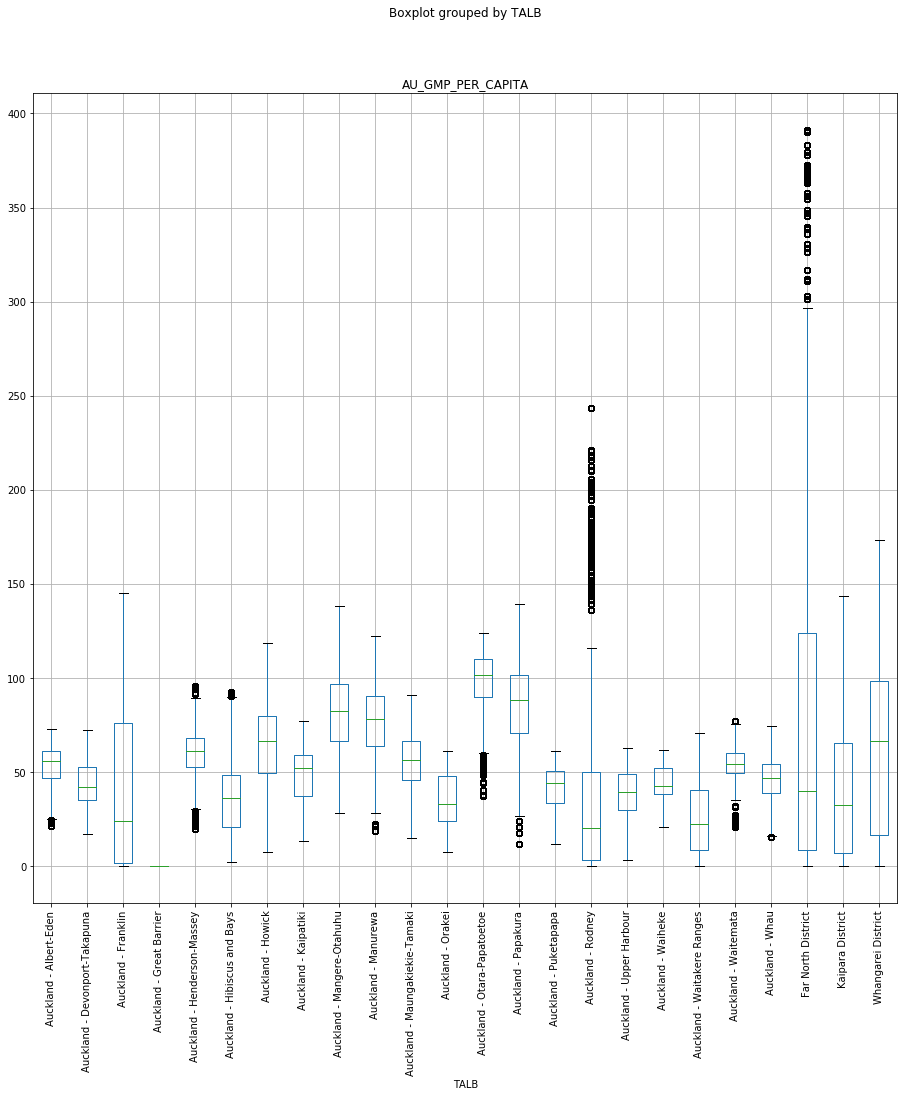

In [40]:
merged_cleaned.boxplot(column='AU_GMP_PER_CAPITA',by='TALB',figsize=(15,15),rot=90)
plt.savefig('/Users/keri/git/DotLovesData/visuals/BoxPlotGMPByTALB.png')

In [45]:
merged_cleaned['crime_proportion'] = merged_cleaned['n'] / merged_cleaned['Pop']

/Users/keri/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


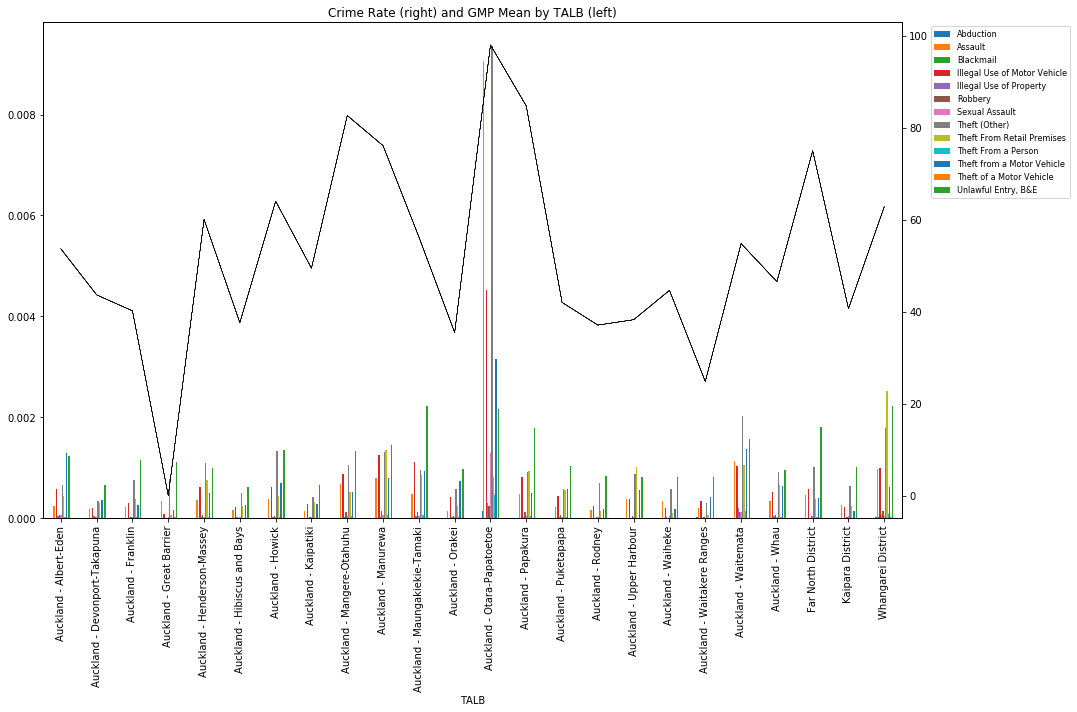

In [95]:
fig, ax = plt.subplots(figsize=(15,10))
ax2 = ax.twinx()
merged_cleaned.groupby(['TALB','crime']).mean()['AU_GMP_PER_CAPITA'].unstack().plot(kind='line',ax=ax2,title='Crime Rate (right) and GMP Mean by TALB (left)', 
                                                                                    style='black',lw=.2,secondary_y=True,legend=False)
merged_cleaned.groupby(['TALB','crime']).mean()['crime_proportion'].unstack().plot(kind='bar',ax=ax,legend='out')
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1), fontsize=8)
plt.tight_layout()
plt.savefig('/Users/keri/git/DotLovesData/visuals/CleanedCrimeDataByTALBandDepIndexMean.png')

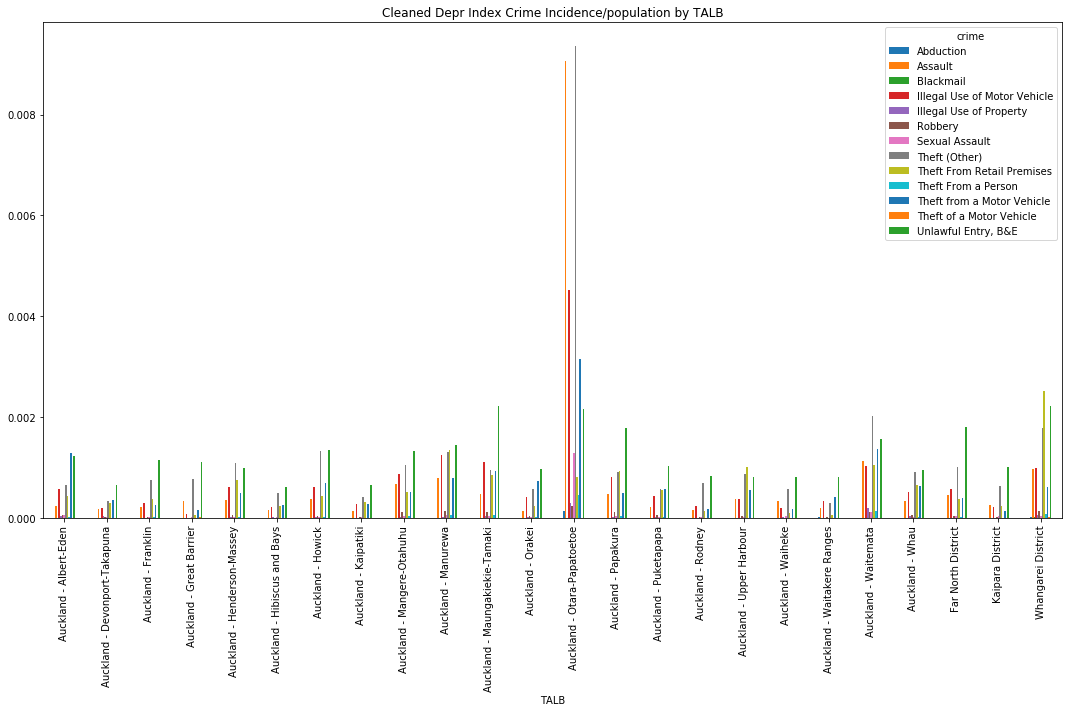

In [88]:
fig, ax = plt.subplots(figsize=(15,10))

merged_cleaned.groupby(['TALB','crime']).mean()['crime_proportion'].unstack().plot(kind='bar',ax=ax,title='Cleaned Depr Index Crime Incidence/population by TALB')
#ax.legend(loc='upper right', bbox_to_anchor=(1.08, 1), fontsize=8)
plt.tight_layout()
plt.savefig('/Users/keri/git/DotLovesData/visuals/CrimeDataFromTALBCleanedDatasetNoDIMean.png')

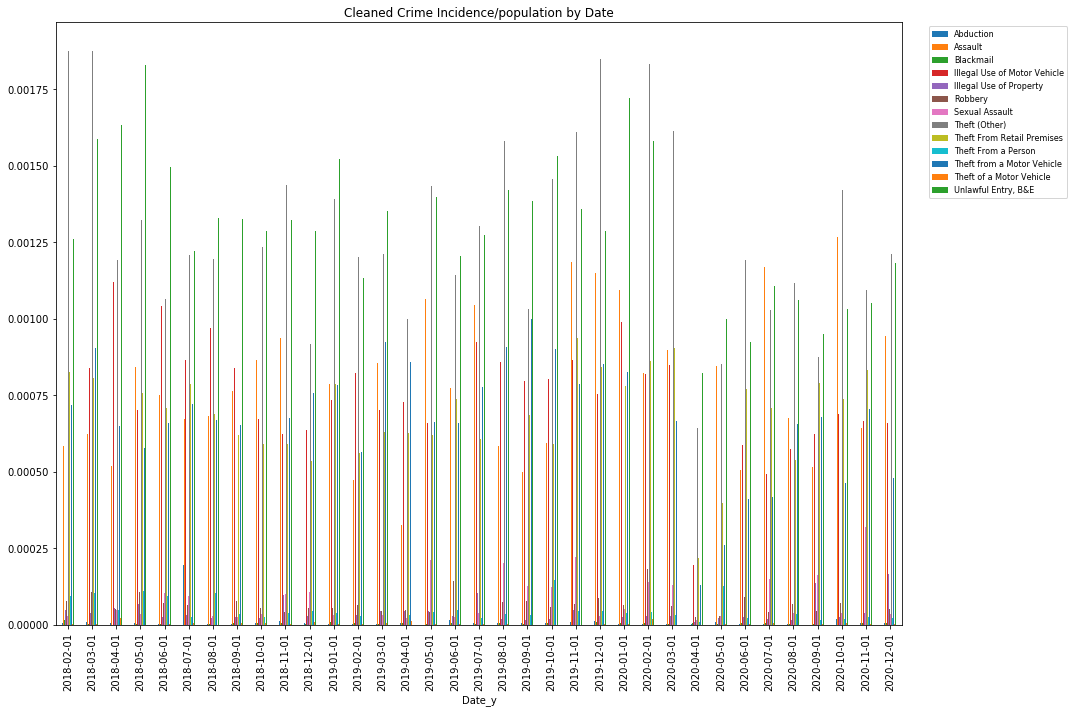

In [91]:
fig, ax = plt.subplots(figsize=(15,10))
merged_cleaned.groupby(['Date_y','crime']).mean()['crime_proportion'].unstack().plot(kind='bar',ax=ax,title='Cleaned Crime Incidence/population by Date')
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1), fontsize=8)
plt.tight_layout()
plt.savefig('/Users/keri/git/DotLovesData/visuals/CrimeDataFromCleanedDatasetByDate.png')

# How does GMP change over time vs deprivation index

In [5]:
communityNonNull = community[community['Dep_Index'].notna()]
communityNonNull.shape

(15159, 7)

In [6]:
communityNonNull.head()

,AU2017_code,Date,AU_GMP_PER_CAPITA,Dep_Index,AU2017_name,TA2018_name,TALB
0,500100,2013-03-01,62.732541,9.0,Awanui,Far North District,Far North District
1,500202,2013-03-01,12.123131,9.0,Karikari Peninsula-Maungataniwha,Far North District,Far North District
2,500203,2013-03-01,151.841014,9.0,Taipa Bay-Mangonui,Far North District,Far North District
3,500204,2013-03-01,56.465011,8.0,Herekino,Far North District,Far North District
4,500205,2013-03-01,0.000000,9.0,Ahipara,Far North District,Far North District


In [34]:
communityNonNull.sort_values(by=['AU2017_code','Date'],ascending=False,inplace=True)

/Users/keri/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
firstDate = communityNonNull.groupby(by=['AU2017_code']).head(1)
print(firstDate.shape)
firstDate.head()

lastDate = communityNonNull.groupby(by=['AU2017_code']).tail(1)
print(lastDate.shape)
lastDate.head()

difference = pd.DataFrame({'code':lastDate['AU2017_code'],'gmp':lastDate['AU_GMP_PER_CAPITA'],
                           'di':lastDate['Dep_Index']})
difference.head()

difference['gmp_diff'] = firstDate['AU_GMP_PER_CAPITA'].values - lastDate['AU_GMP_PER_CAPITA'].values
difference['di_diff'] = firstDate['Dep_Index'].values - lastDate['Dep_Index'].values

difference.head()

difference.shape

difference.drop(columns=['gmp','di'],inplace=True)

difference.drop(columns=['code'],inplace=True)

(489, 7)


,AU2017_code,Date,AU_GMP_PER_CAPITA,Dep_Index,AU2017_name,TA2018_name,TALB
16426,526105,2020-09-01,58.499598,4.0,South Waiuku,Auckland,Auckland - Franklin
16425,526104,2020-09-01,73.916224,7.0,Waiuku East,Auckland,Auckland - Franklin
16424,526103,2020-09-01,75.963201,7.0,Waiuku West,Auckland,Auckland - Franklin
16423,525922,2020-09-01,82.383033,6.0,Bledisloe Park,Auckland,Auckland - Franklin
16422,525921,2020-09-01,67.657555,6.0,Pukekohe West,Auckland,Auckland - Franklin


In [50]:
import matplotlib.pyplot as plt

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
ax2 = ax.twinx()
difference.plot(kind='line',ax=ax,y='gmp_diff',secondary_y=True)
difference.plot(kind='line',ax=ax2,y='di_diff')

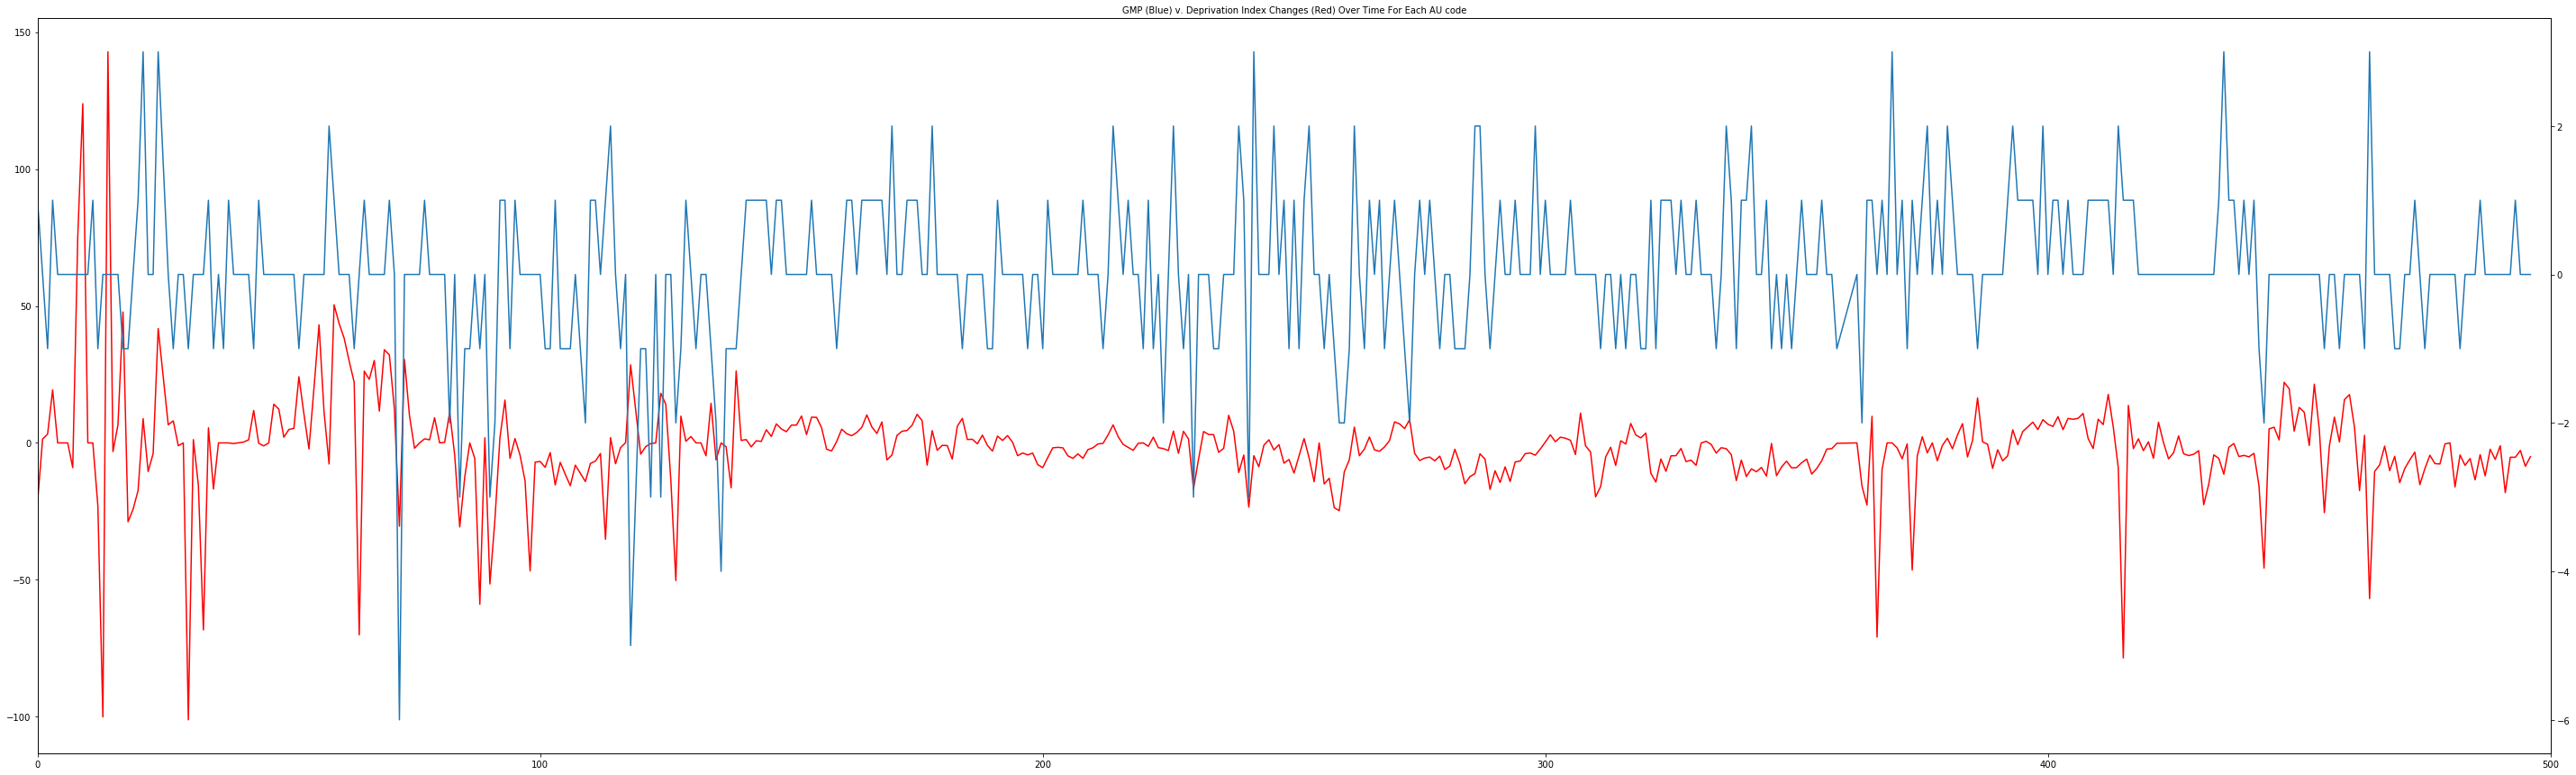

In [81]:
fig, ax = plt.subplots(figsize=(50,15))
ax2 = ax.twinx()
rspine = ax2.spines['right']
difference['gmp_diff'].plot(ax=ax, style='r-')                                                                                                                                                
difference['di_diff'].plot(kind='line',ax=ax2,y='di_diff')                                                         
plt.xlim(0,500)
plt.xticks=range(20,480,20)
plt.title('GMP (Blue) v. Deprivation Index Changes (Red) Over Time For Each AU code', fontsize=10)
plt.savefig('/Users/keri/git/DotLovesData/visuals/GMPvDIOverTimePerAUCode.png')

# Redo but sort by TALB instead of AU codes

In [82]:
communityNonNull.head()

,AU2017_code,Date,AU_GMP_PER_CAPITA,Dep_Index,AU2017_name,TA2018_name,TALB
16426,526105,2020-09-01,58.499598,4.0,South Waiuku,Auckland,Auckland - Franklin
15895,526105,2020-06-01,32.340037,5.0,South Waiuku,Auckland,Auckland - Franklin
15364,526105,2020-03-01,57.221888,4.0,South Waiuku,Auckland,Auckland - Franklin
14833,526105,2019-12-01,72.127348,4.0,South Waiuku,Auckland,Auckland - Franklin
14302,526105,2019-09-01,71.560960,5.0,South Waiuku,Auckland,Auckland - Franklin


In [83]:
firstDate = communityNonNull.groupby(by=['TALB']).head(1)
print(firstDate.shape)

lastDate = communityNonNull.groupby(by=['TALB']).tail(1)
print(lastDate.shape)

difference = pd.DataFrame({'code':lastDate['TALB'],'gmp':lastDate['AU_GMP_PER_CAPITA'],
                           'di':lastDate['Dep_Index']})
difference.head()

difference['gmp_diff'] = firstDate['AU_GMP_PER_CAPITA'].values - lastDate['AU_GMP_PER_CAPITA'].values
difference['di_diff'] = firstDate['Dep_Index'].values - lastDate['Dep_Index'].values

print(difference.shape)

difference.drop(columns=['gmp','di'],inplace=True)

difference.drop(columns=['code'],inplace=True)

(24, 7)
(24, 7)
(24, 5)


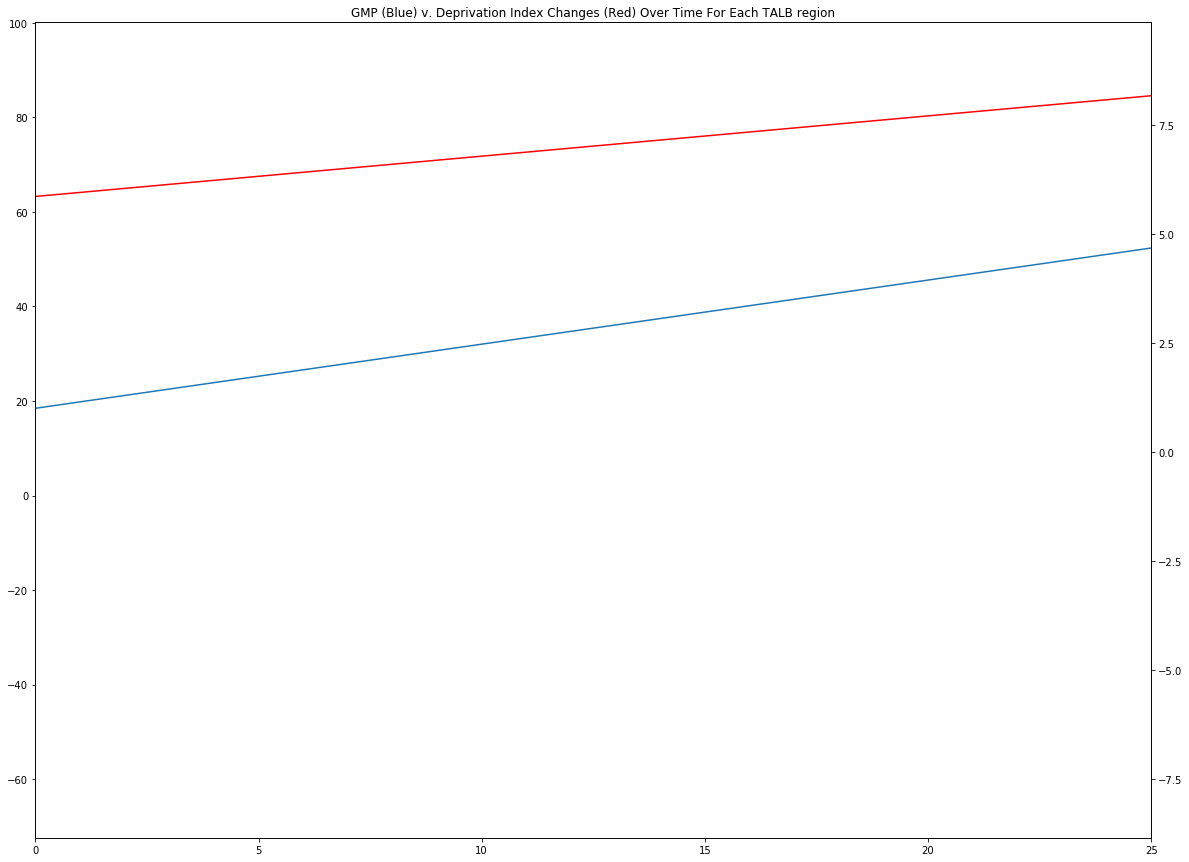

In [85]:
fig, ax = plt.subplots(figsize=(20,15))
ax2 = ax.twinx()
rspine = ax2.spines['right']
difference['gmp_diff'].plot(ax=ax, style='r-')                                                                                                                                                
difference['di_diff'].plot(kind='line',ax=ax2,y='di_diff')                                                         
plt.xlim(0,25)
#plt.xticks=range(20,480,20)
plt.title('GMP (Blue) v. Deprivation Index Changes (Red) Over Time For Each TALB region')
plt.savefig('/Users/keri/git/DotLovesData/visuals/GMPvDIOverTimePerTALB.png')

# Getting the rows that have a difference in the direction of change between Deprivation Score and GMP

In [87]:
communityNonNull.head()

,AU2017_code,Date,AU_GMP_PER_CAPITA,Dep_Index,AU2017_name,TA2018_name,TALB
16426,526105,2020-09-01,58.499598,4.0,South Waiuku,Auckland,Auckland - Franklin
15895,526105,2020-06-01,32.340037,5.0,South Waiuku,Auckland,Auckland - Franklin
15364,526105,2020-03-01,57.221888,4.0,South Waiuku,Auckland,Auckland - Franklin
14833,526105,2019-12-01,72.127348,4.0,South Waiuku,Auckland,Auckland - Franklin
14302,526105,2019-09-01,71.560960,5.0,South Waiuku,Auckland,Auckland - Franklin


In [91]:
#get the difference between the rows
communityDiff = communityNonNull[['AU_GMP_PER_CAPITA','Dep_Index']].diff()
communityDiff['Date'] = communityNonNull['Date']
communityDiff['code'] = communityNonNull['AU2017_code']

In [92]:
communityDiff.head()

,AU_GMP_PER_CAPITA,Dep_Index,Date,code
16426,NaN,NaN,2020-09-01,526105
15895,-26.159561,1.0,2020-06-01,526105
15364,24.881851,-1.0,2020-03-01,526105
14833,14.905461,0.0,2019-12-01,526105
14302,-0.566388,1.0,2019-09-01,526105


In [94]:
posDIDiff = communityDiff[communityDiff['Dep_Index'] > 0]
posDINegGMP = posDIDiff[posDIDiff['AU_GMP_PER_CAPITA'] < 0]
print(posDINegGMP.shape)
posDINegGMP.head()

(602, 4)


,AU_GMP_PER_CAPITA,Dep_Index,Date,code
15895,-26.159561,1.0,2020-06-01,526105
14302,-0.566388,1.0,2019-09-01,526105
9523,-4.664217,1.0,2017-06-01,526105
6868,-2.824514,1.0,2016-03-01,526105
16422,-19.970088,1.0,2020-09-01,525921


In [104]:
posDINegGMPPlot = posDINegGMP.drop(columns=['Date'])
posDINegGMPPlot.index = posDINegGMP['code']
posDINegGMPPlot.drop(columns=['code'],inplace=True)
posDINegGMPPlot.head()

,AU_GMP_PER_CAPITA,Dep_Index
code,,
526105,-26.159561,1.0
526105,-0.566388,1.0
526105,-4.664217,1.0
526105,-2.824514,1.0
525921,-19.970088,1.0


In [113]:
len(posDINegGMP['code'].unique())

297

# Plot the pos DI, neg GPM  in smaller pieces to visualize better

# Look at each date separately

In [160]:
dates = posDINegGMP['Date'].unique()
len(dates)

29

In [180]:
posDINegGMP.shape

(602, 4)

In [181]:
posDINegGMP.head()

,AU_GMP_PER_CAPITA,Dep_Index,Date,code
15895,-26.159561,1.0,2020-06-01,526105
14302,-0.566388,1.0,2019-09-01,526105
9523,-4.664217,1.0,2017-06-01,526105
6868,-2.824514,1.0,2016-03-01,526105
16422,-19.970088,1.0,2020-09-01,525921


In [185]:
groupedPosIDNegGMP = posDINegGMP.groupby(by=['code','Date']).mean()

In [232]:
pd.options.display.max_rows = None

In [244]:
groupedPosIDNegGMP.index.levels[0]

Int64Index([500203, 500207, 500208, 500802, 500900, 501000, 501100, 501200,
            501300, 501612,
            ...
            525410, 525420, 525520, 525530, 525540, 525610, 525700, 525910,
            525921, 526105],
           dtype='int64', name='code', length=297)

[(500203, '2018-09-01'), (500207, '2020-09-01'), (500208, '2020-06-01'), (500802, '2020-09-01'), (500900, '2017-03-01'), (500900, '2017-09-01'), (501000, '2014-12-01'), (501000, '2015-09-01'), (501000, '2017-06-01'), (501100, '2020-06-01'), (501200, '2020-09-01'), (501300, '2013-09-01'), (501300, '2018-09-01'), (501612, '2015-09-01'), (501612, '2015-12-01'), (501612, '2019-09-01'), (501614, '2019-09-01'), (501615, '2017-09-01'), (501631, '2020-09-01'), (501632, '2014-03-01'), (501632, '2020-09-01'), (501802, '2016-09-01'), (501802, '2018-06-01'), (501802, '2019-09-01'), (501802, '2020-06-01'), (501806, '2015-09-01'), (501811, '2014-03-01'), (501811, '2016-03-01'), (501811, '2019-06-01'), (501814, '2014-03-01'), (501814, '2016-09-01'), (501814, '2020-09-01'), (501815, '2019-06-01'), (501816, '2015-09-01'), (501816, '2018-03-01'), (501817, '2020-09-01'), (501818, '2015-09-01'), (501818, '2018-03-01'), (501818, '2018-09-01'), (502001, '2014-03-01'), (502001, '2017-06-01'), (502001, '2020-

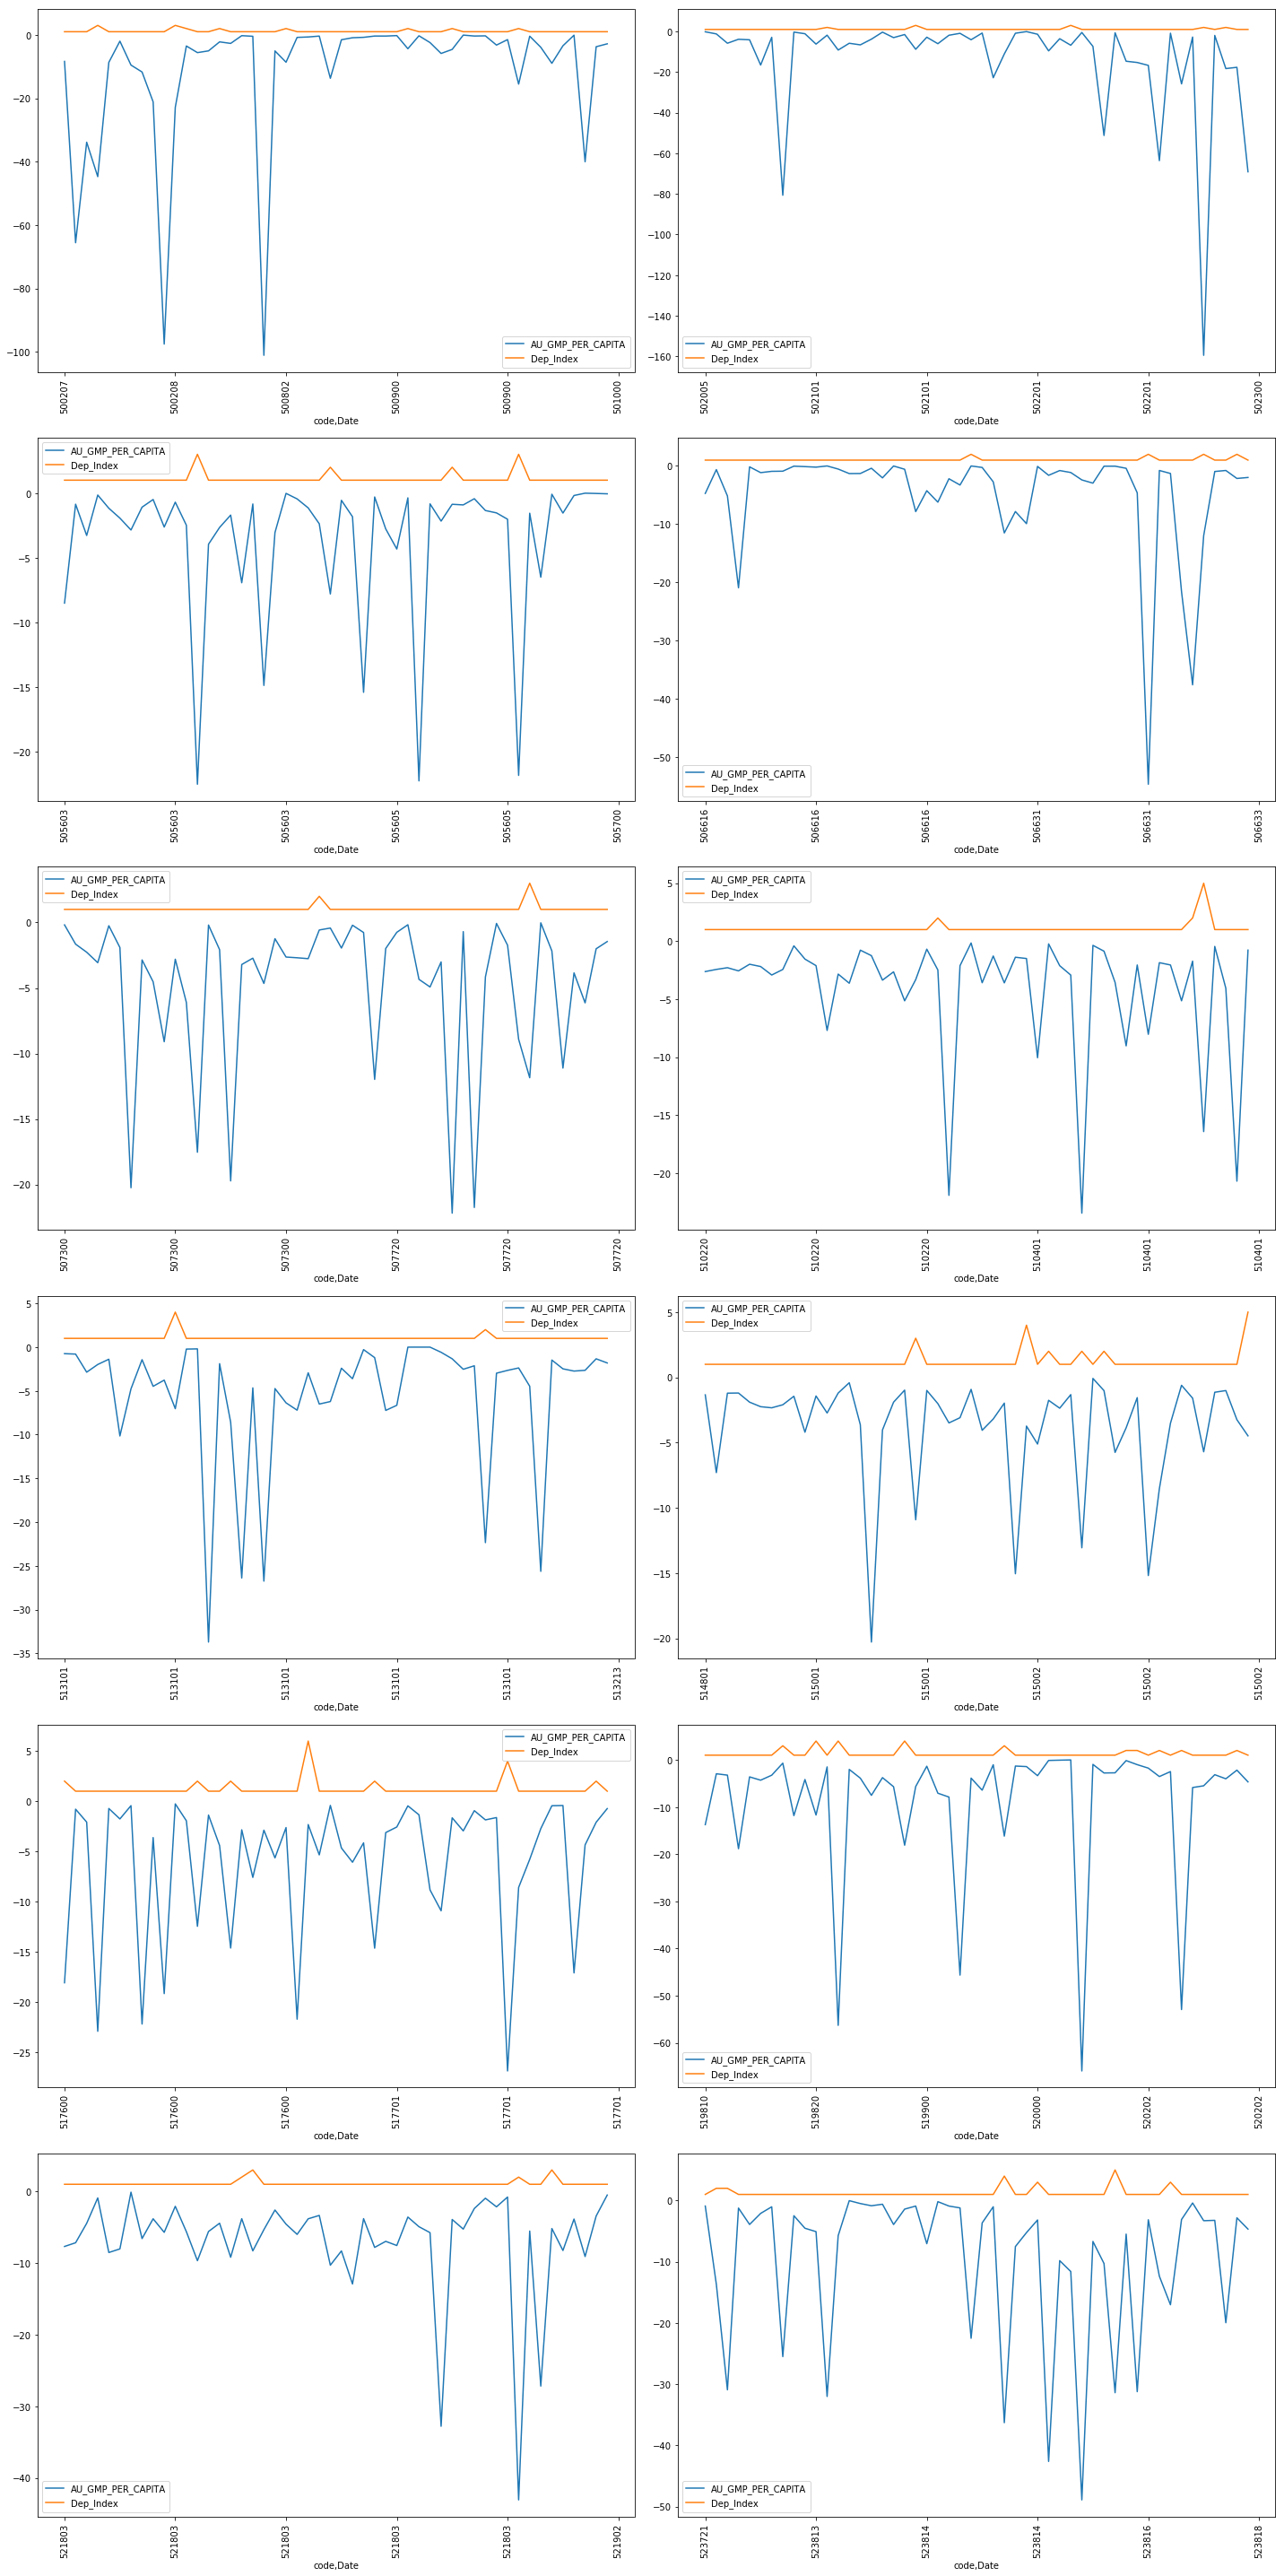

In [243]:
fig,axes = plt.subplots(6,2,figsize=(20,40))
i = 0
for row in axes:
    for col in row:
        plotDf = groupedPosIDNegGMP[i*50:50*(i+1)]
        plotDf.plot(ax=col)
        print([label for label in plotDf.index])
        col.set_xticklabels([label[0] for label in plotDf.index], rotation=90)
        i += 1
fig. tight_layout()
#fig.suptitle('Areas Showing Postive Growth in Deprivation Index AND Negative Growth GMP Over Time',fontsize=14)    
plt.savefig('/Users/keri/git/DotLovesData/visuals/PositiveDINegativeGMPOverTime.png', papertype='executive')

# Plot Areas with positive GMP growth and negative Deprivation Index

In [214]:
negDIDiff = communityDiff[communityDiff['Dep_Index'] < 0]
negDIPosGMP = negDIDiff[negDIDiff['AU_GMP_PER_CAPITA'] > 0]
print(negDIPosGMP.shape)
negDIPosGMP.head()

(509, 4)


,AU_GMP_PER_CAPITA,Dep_Index,Date,code
15364,24.881851,-1.0,2020-03-01,526105
6337,4.727612,-1.0,2015-12-01,526105
16423,3.652066,-1.0,2020-09-01,525922
12175,1.728862,-1.0,2018-09-01,525922
5803,1.135719,-1.0,2015-09-01,525922


In [216]:
groupedNegDIPosGMP = negDIPosGMP.groupby(by=['code','Date']).mean()

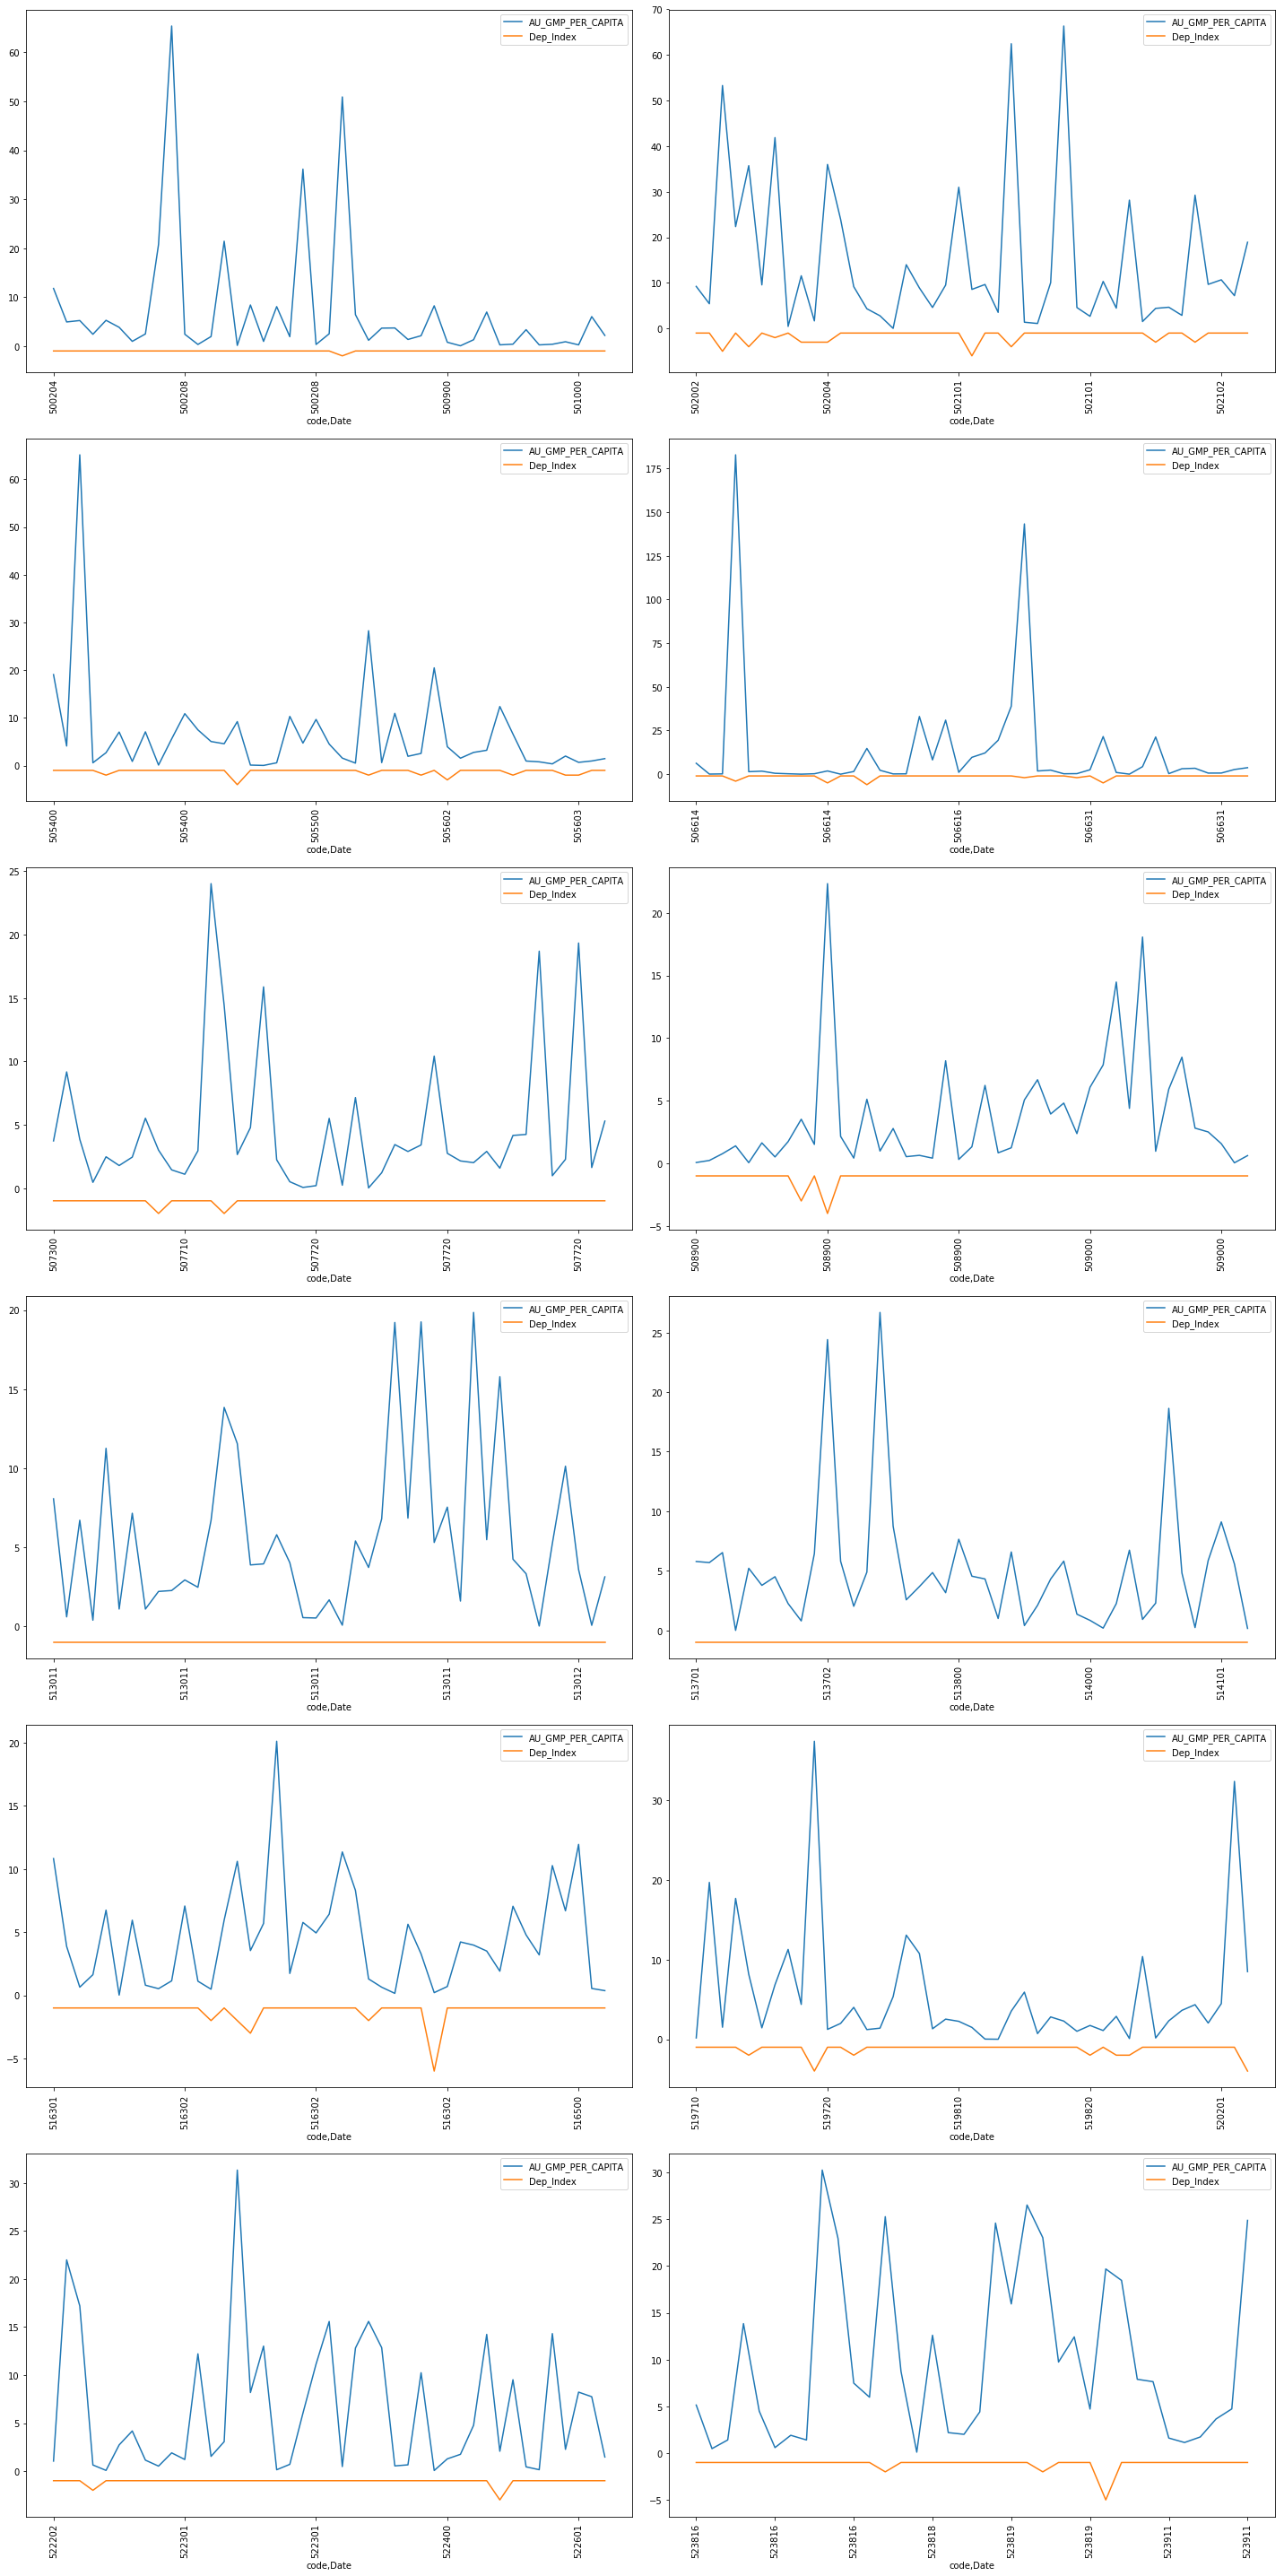

In [246]:
fig,axes = plt.subplots(6,2,figsize=(20,40))
i = 0
for row in axes:
    for col in row:
        plotDf = groupedNegDIPosGMP[i*43:43*(i+1)]
        plotDf.plot(ax=col,)
        col.set_xticklabels([label[0] for label in plotDf.index], rotation=90)
        i += 1
plt.tight_layout()
#plt.title('Areas Showing Postive Growth in Deprivation Index AND Negative Growth GMP Over Time')    
plt.savefig('/Users/keri/git/DotLovesData/visuals/NegativeDIPositiveGMPOverTime.png', papertype='executive')